# Preprocessing of the data

In [ ]:
# Putting all the paths in a list to retrive the data
import pandas as pd
path_list = []
for i in range(111):
    path_list.append('/Users/saudahmad/Desktop/dataset/halfhourly_dataset/halfhourly_dataset/block_' + str(i + 1) + '.csv')

# list of dataframes every dataframe in the list contain the files data and there are 111 different files
data_list = []
for i in range(111):
    df = pd.read_csv(path_list[i],low_memory=False)
    data = pd.DataFrame(df)
    data_list.append(data)


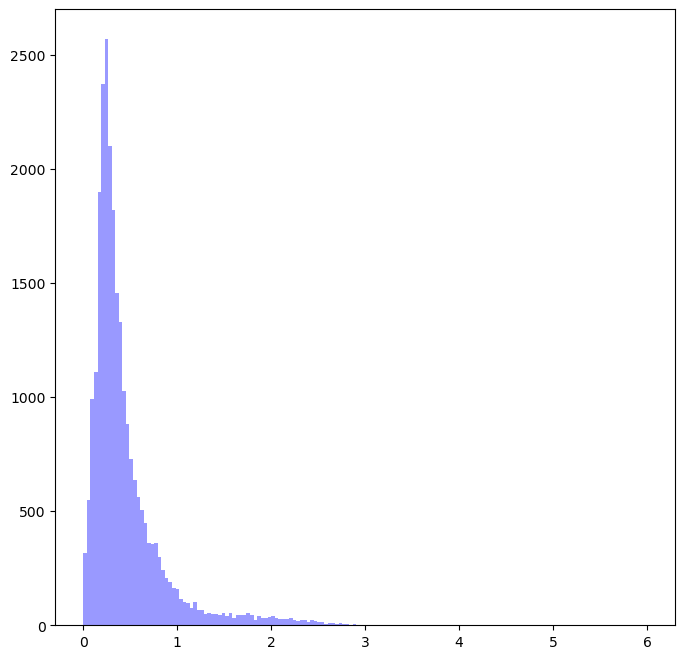

In [111]:
# Checking the nature of different blocks fo data using visualization
import numpy as np
import matplotlib.pyplot as plt
x = data['LCLid']  # Or another column that represents the x-axis
y = data['energy_mean']
fig = plt.figure(figsize = (8, 8))


min_value=0
max_value=6
num_bins = int(np.sqrt(len(x)))

# Create a histogram with specified range and bins
plt.hist(y, bins=num_bins, range=(min_value, max_value), color='blue', alpha=0.4)

plt.show()

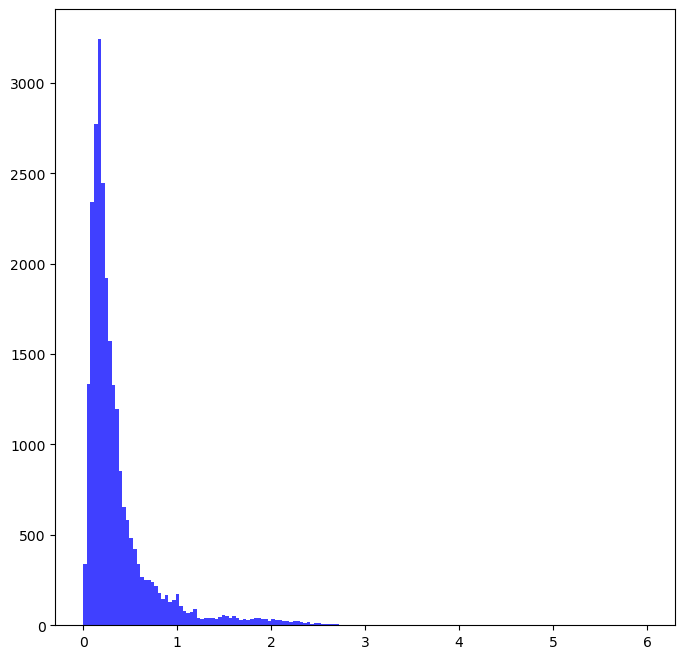

In [116]:
# Checking the nature of different blocks fo data using visualization
import numpy as np
import matplotlib.pyplot as plt



x = data['LCLid']  # Or another column that represents the x-axis
y = data['energy_median']
fig = plt.figure(figsize = (8, 8))


min_value=0
max_value=6
num_bins = int(np.sqrt(len(x)))

# Create a histogram with specified range and bins
plt.hist(y, bins=num_bins, range=(min_value, max_value), color='blue', alpha=0.75)

plt.show()

           

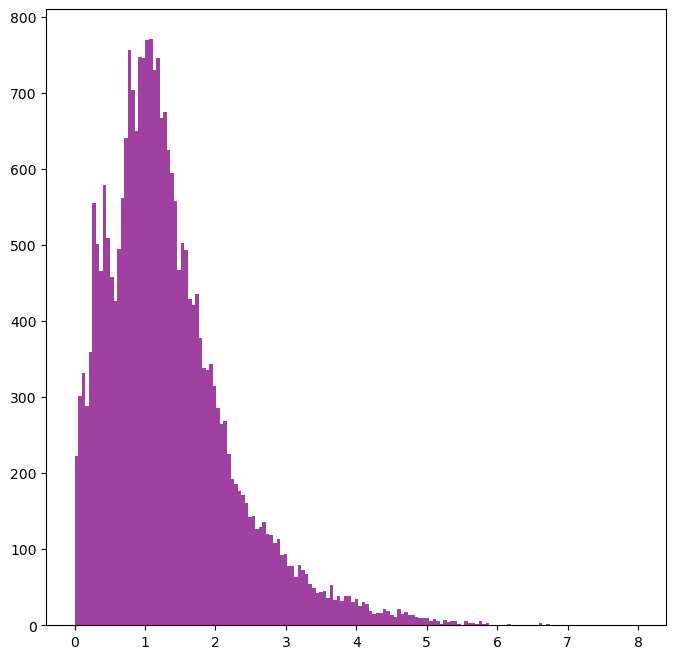

In [121]:
# Checking the nature of different blocks fo data using visualization
import numpy as np
import matplotlib.pyplot as plt



x = data['LCLid']  # Or another column that represents the x-axis
y = data['energy_max']
fig = plt.figure(figsize = (8, 8))


min_value=0
max_value=8
num_bins = int(np.sqrt(len(x)))

# Create a histogram with specified range and bins
plt.hist(y, bins=num_bins, range=(min_value, max_value), color='purple', alpha=0.75)

plt.show()

        energy_count  energy_std  energy_sum  energy_min    

In [2]:
# Putting all the paths in a list to retrive the data for daily daat usage
import pandas as pd
path_list = []
for i in range(111):
    path_list.append('/Users/saudahmad/Desktop/dataset/daily_dataset/daily_dataset/block_' + str(i + 1) + '.csv')

# list of dataframes every dataframe in the list contain the files data and there are 111 different files
data_list = []
for i in range(111):
    df = pd.read_csv(path_list[i],low_memory=False)
    data = pd.DataFrame(df)
    data_list.append(data)
    

In [4]:
# to collect house ids
data = pd.read_csv('/Users/saudahmad/Desktop/dataset/informations_households.csv')
data = pd.DataFrame(data)
house_ids = data.iloc[:,[0]]
house_ids.tail()



,LCLid
5561,MAC002056
5562,MAC004587
5563,MAC004828
5564,MAC001704
5565,MAC002774


In [30]:
# putting house ids and daily power consumption for around 5600 different houses in a csv file
path = '/Users/saudahmad/desktop/dataset/update/total.csv'
for i in range(111):
    data_list[i].iloc[:,[0,7]].to_csv(path,index=False, mode='a', header=not i)
    

In [5]:
# Reading the new files made in the previous code
data = pd.read_csv('/Users/saudahmad/desktop/dataset/update/total.csv')
len(data)

3484859

In [57]:
# Adding all the power consumption of every home and putting the data in a new file with house id
df1 = pd.DataFrame()
new_path = '/Users/saudahmad/desktop/dataset/update/total_sum.csv'
for i in range(5515):
    df1['LCLid'] = data[data['LCLid'] == house_ids['LCLid'][i+50]]['LCLid'].unique()
    df1['energy_sum'] = data[data['LCLid'] == house_ids['LCLid'][i+50]]['energy_sum'].sum()
    df1.to_csv(new_path,index=False, mode='a', header=not i)





In [184]:
# Reading the data and doing some statistics 
data = pd.read_csv(new_path)
print("The max power consumed",data['energy_sum'].max(),"\n\n")
print("Standard deviation",data['energy_sum'].std(),"\n\n")
print("Mean",data['energy_sum'].mean(),"\n\n")

The max power consumed 51950.872008800005 


Standard deviation 4663.371139683072 


Mean 6343.568915574941 




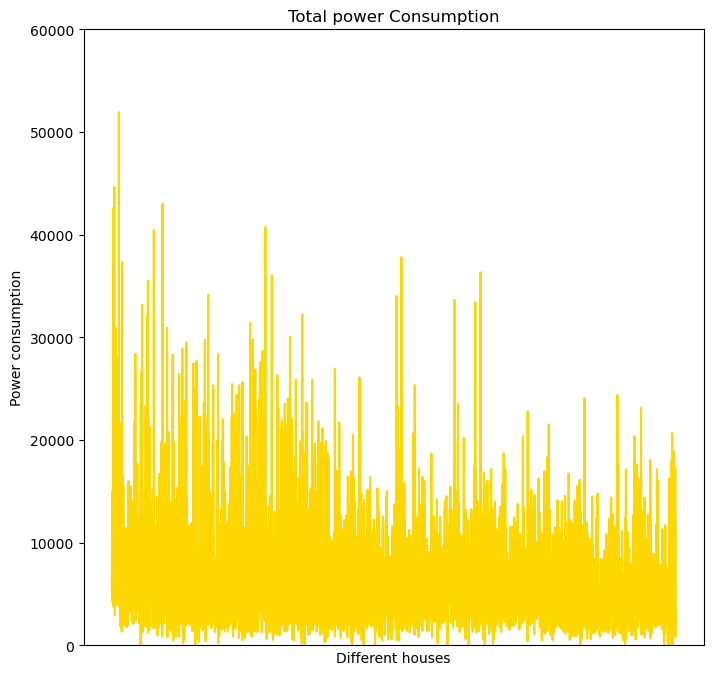

In [178]:
# Visualization of the total power consumed by different houses
import numpy as np
import matplotlib.pyplot as plt

# Plotting using DataFrame directly
fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(data['LCLid'], data['energy_sum'], color='gold')

ax.set_xlabel("Different houses")
ax.set_ylabel("Power consumption")
ax.set_title("Total power Consumption")

# Setting the limit of y-axis
plt.ylim(0, 60000)
ax.set_xticks([])

plt.show()

# Algorithms Implementation

In [162]:
# Random Forest Implemented

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



X = data[['energy_sum']]  # X is a DataFrame with one column of float
y = data['LCLid']     # y is a Series with string values

# Convert string labels to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Decode the numeric predictions back to string labels
y_pred_decoded = label_encoder.inverse_transform(y_pred.astype(int))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the original and predicted labels
results = pd.DataFrame({'Original': y_test, 'Predicted': y_pred_decoded})
print(results.head())



Mean Squared Error: 3686889.761571924
   Original  Predicted
0      1515  MAC003421
1      2762  MAC001412
2      3030  MAC003413
3      2028  MAC002021
4      1598  MAC002855


In [187]:
#Apriori implemented
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Sample transaction dataset (example)
data1 = data_list[0]
data2 = data_list[1]

test = pd.concat([data1.iloc[:,[2]].head(100), data.iloc[:,[0]].head(100)], axis=1)
test.columns = ['E1','E2']
df = test

# Convert items column to one-hot encoded format
oht = df['E2'].str.join('|').str.get_dummies('|')

# Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(oht, min_support=0.3, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Display association rules
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
     support         itemsets
0       1.00              (0)
1       0.40              (1)
2       0.40              (2)
3       0.45              (3)
4       0.31              (4)
..       ...              ...
122     0.45  (M, 0, 3, C, A)
123     0.31  (M, 4, 0, C, A)
124     0.32  (M, 5, 0, C, A)
125     0.32  (M, 0, 6, C, A)
126     0.31  (M, 0, 8, C, A)

[127 rows x 2 columns]

Association Rules:
    antecedents   consequents  antecedent support  consequent support  \
0           (1)           (0)                0.40                1.00   
1           (0)           (1)                1.00                0.40   
2           (2)           (0)                0.40                1.00   
3           (0)           (2)                1.00                0.40   
4           (0)           (3)                1.00                0.45   
..          ...           ...                 ...                 ...   
955         (M)  (8, C, 0, A)                1.00                0

/Users/saudahmad/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
